<a href="https://colab.research.google.com/github/brianisinga/SpamGuard/blob/main/spamguard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#

In [ ]:
data = pd.read_csv('/content/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## **text cleaning**

In [ ]:
import nltk
nltk.download('stopwords')
!pip install emoji
!pip install pyspellchecker

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 58.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import string
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from spellchecker import spellchecker

# Load the data
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Function to clean the text
def clean_text(text):
    """
    Cleans the input text by removing special characters, converting to lowercase,
    and handling potential NaN values.
    """
    if pd.isna(text):  # Handle NaN values, replace with empty string
        return ''
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    #spell = spellchecker()
    #tokens = [spell.correction(token) for token in tokens]
    text = emoji.demojize(text)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the cleaning function to all text columns
for column in data.columns:
    if data[column].dtype == 'object':  # Check if column is of text type
        data[column] = data[column].apply(clean_text)

# Display the first few rows of the cleaned data
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,go jurong point crazy available bugis n great ...,,,
1,ham,ok lar joking wif u oni,,,
2,spam,free entry wkly comp win fa cup final tkts st ...,,,
3,ham,u dun say early hor u c already say,,,
4,ham,nah dont think goes usf lives around though,,,


## **Visualizations**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#count of spam and ham messages
label_counts = data['v1'].value_counts()
label_counts

,count
v1,
ham,4825
spam,747


<ipython-input-21-ba23f871cc70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


Text(0, 0.5, 'Count')

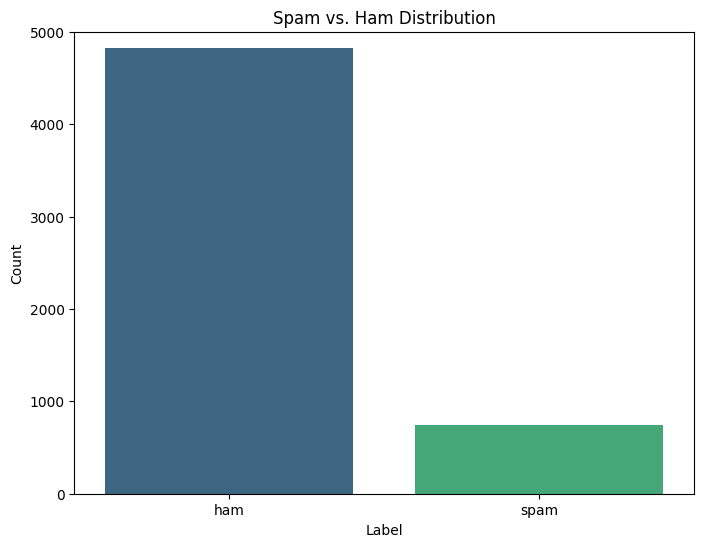

In [21]:
#Bar Plot of Spam vs. Ham Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.ylim(0, 5000)
plt.xticks(rotation=0)
plt.title('Spam vs. Ham Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# **Vectorization**
Convert text into numerical form

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['v2'])


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
y = data['v1']
y

,v1
0,ham
1,ham
2,spam
3,ham
4,ham
5,spam
6,ham
7,ham
8,spam
9,spam


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## model selection

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

Multinomial Naive Bayes Accuracy: 0.9677
Logistic Regression Accuracy: 0.9471
Support Vector Machine Accuracy: 0.9758
Decision Tree Accuracy: 0.9596
Random Forest Accuracy: 0.9731
Gradient Boosting Accuracy: 0.9659
Neural Network Accuracy: 0.9803
